# **Entender el negocio**

Mejorar la comprensión de los factores que influyen en la salud mental de los estudiantes y predecir quiénes podrían necesitar atención.

Crear un modelo que pueda predecir la necesidad de tratamiento de salud mental basado en las respuestas de una encuesta.

# **Entender la data**

1. Cargar y explorar los datos:

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Cargar el archivo CSV
df = pd.read_csv('encuesta.csv')

# Limpiar los nombres de las columnas
df.columns = df.columns.str.strip()

# Convertir la columna 'Timestamp' a tipo de dato de fecha
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y')

# Extraer características de la fecha (opcional)
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

# Eliminar la columna 'Timestamp' si no es relevante para el modelado
df = df.drop(columns=['Timestamp'])

# Eliminar la columna 'comments' si no es relevante para el modelado
df = df.drop(columns=['comments'])

# Ver las primeras filas del DataFrame
print(df.head())

# Obtener información general del DataFrame
df.info()

# Resumen estadístico
print(df.describe())

   Age  Gender         City                   carrer family_history treatment  \
0   24    Male     Agronomy               Accounting            Yes       Yes   
1   25    Male     Agronomy               Management            Yes       Yes   
2   22  Female     Imperial      Systems engineering             No        No   
3   23  Female  San Vicente  Hospitality and tourism             No       Yes   
4   25  Female     Imperial      Systems engineering             No        No   

  work_interfere no_employees remote_work tech_company  ...  \
0      Sometimes           57          No          Yes  ...   
1            Yes           58   Sometimes           No  ...   
2            Yes          132      Always          Yes  ...   
3         Always           58         Yes           No  ...   
4             No          1-5       Never          Yes  ...   

  physical_health_consequence coworkers supervisor mental_health_interview  \
0                         Yes        No         No      

# **Entender las variables**

Variables demográficas: Age, Gender, City, carrer /
Historial familiar: family_history /
Tratamiento previo: treatment /
Interferencia laboral: work_interfere /
Tamaño de la empresa: no_employees /
Trabajo remoto: remote_work /
Industria: tech_company /
Beneficios y opciones de cuidado: benefits, care_options/
Programas de bienestar: wellness_program /
Anonimato y permisos: seek_help, anonymity
Consecuencias para la salud mental y física: mental_health_consequence, physical_health_consequence /
Interacción con compañeros y supervisores: coworkers, supervisor /
Entrevistas de salud: mental_health_interview, physical_health_interview /
Otros: mental_vs_physical, obs_consequence, comments

# **Preparar la data**

1. Manejo de valores faltantes:


In [ ]:
# Verificar valores faltantes
df.isnull().sum()

Age                            0
Gender                         0
City                           0
carrer                         0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
mental_health_consequence      0
physical_health_consequence    0
coworkers                      0
supervisor                     0
mental_health_interview        0
physical_health_interview      0
mental_vs_physical             0
obs_consequence                0
Year                           0
Month                          0
Day                            0
dtype: int64

2. Codificación de variables categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Codificar las variables categóricas
categorical_columns = ['Gender', 'City', 'carrer', 'family_history', 'treatment', 'work_interfere',
                       'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program',
                       'seek_help', 'anonymity', 'mental_health_consequence', 'physical_health_consequence',
                       'coworkers', 'supervisor', 'mental_health_interview', 'physical_health_interview',
                       'mental_vs_physical', 'obs_consequence']
labelencoder = LabelEncoder()
for column in categorical_columns:
    if column in df.columns:
        df[column] = labelencoder.fit_transform(df[column])
    else:
        print(f"Column '{column}' not found in the DataFrame")

# Convertir la columna 'no_employees' a valores numéricos
employee_mapping = {
    '1-5': 3,
    '6-25': 15,
    '10-15': 13,
    '15-25': 20,
    '26-100': 63,
    '70-100': 85,
    '80-100': 90,
    '150-200': 175,
    '': 0,
}
df['no_employees'] = df['no_employees'].replace(employee_mapping).astype(int)

# Verificar las primeras filas del DataFrame para confirmar las transformaciones
print(df.head())

   Age  Gender  City  carrer  family_history  treatment  work_interfere  \
0   24       1     0       2               1          1               2   
1   25       1     0       6               1          1               3   
2   22       0     5       7               0          0               3   
3   23       0     8       4               0          1               0   
4   25       0     5       7               0          0               1   

   no_employees  remote_work  tech_company  ...  physical_health_consequence  \
0            57            3             1  ...                            1   
1            58            4             0  ...                            1   
2           132            2             1  ...                            0   
3            58            5             0  ...                            1   
4             3            0             1  ...                            1   

   coworkers  supervisor  mental_health_interview  physical_health_i

# **Modelado**


Seleccionar un modelo de machine learning adecuado (p. ej., clasificación binaria para predecir la necesidad de tratamiento de salud mental).
Dividir los datos en conjuntos de entrenamiento y prueba.

In [ ]:
# Definir las características (features) y la variable objetivo (target)
X = df.drop(columns=['treatment'])  # Asumiendo que 'treatment' es la variable objetivo
y = df['treatment']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Entrenamiento y validación**

In [ ]:
# Entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Validar el modelo
y_pred = model.predict(X_test)

# Evaluar el desempeño del modelo
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



Matriz de confusión

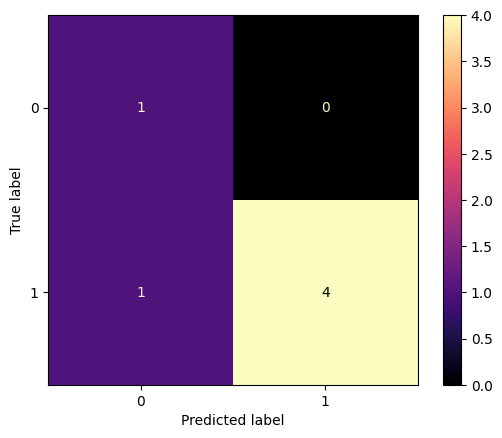

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Import the matplotlib library


cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Generar la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='magma', values_format='d')
plt.show() # Now plt is defined and can be used

Curva ROC y AUC

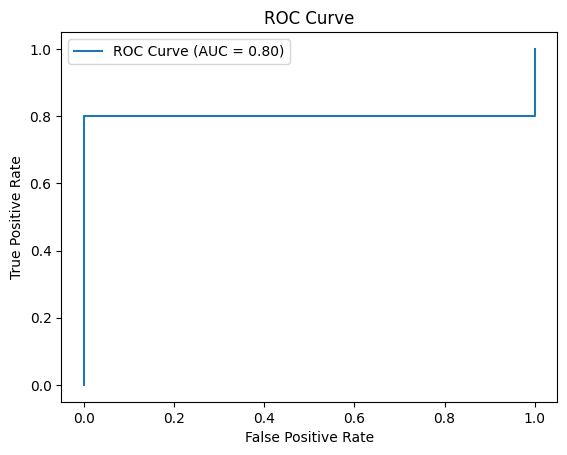

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score (weighted): {f1}')

F1 Score (weighted): 0.851851851851852


Ajuste de Hiperparámetros

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_model = grid_search.best_estimator_

# Evaluar el modelo con los mejores parámetros
y_pred = best_model.predict(X_test)
print(f"Accuracy with best parameters: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy with best parameters: 0.8333333333333334
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6

[[1 0]
 [1 4]]
